<a href="https://colab.research.google.com/github/KhudV/MML/blob/main/Lab1_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Худицкий Василий
##### Группа:   НКНбд-01-19

## Москва 2022
***

### Вариант №_18_

1. Загрузите из набора данных ‘diamonds’ следующие признаки:

features/depth, features/x, features/z

2. Определите признак с максимальным диапазоном изменения значений и постройте гистограмму значений признака.

3. Для признака, имеющего максимальное среднее значение, постройте и визуализируйте эмпирическую плотность распределения.

4. Вычислите матрицу корреляции признаков и для пары признаков с наиболее низкой корреляцией постройте диаграмму рассеяния.

**Решение**

Пункт 1.

Использую команду !pip install -q tfds-nightly, чтобы активировать последние версии наборов данных

In [ ]:
!pip install -q tfds-nightly

     |████████████████████████████████| 4.3 MB 4.6 MB/s 
     |████████████████████████████████| 86 kB 3.9 MB/s 


Для выполнения лабораторной работы №1 использую модуль Tensorflow Datasets, библиотеки pandas и numpy.

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np

Считаем из TFDS набор данных "diamonds" и преобразуем получившийся объект PrefetchDataset в датафрейм:

In [ ]:
ds = tfds.load("diamonds", split='train')
df = tfds.as_dataframe(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/diamonds/1.0.0.incompleteXKP7E9/diamonds-train.tfrecord*...:   0%|          | …

Dataset diamonds downloaded and prepared to ~/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.


In [ ]:
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Оставим в датафрейме только требуемые по заданию признаки

In [ ]:
df=df[['features/depth', 'features/x', 'features/z']]
df.head()

,features/depth,features/x,features/z
0,60.599998,6.97,4.23
1,62.099998,5.96,3.71
2,61.700001,5.28,3.27
3,64.000000,7.24,4.64
4,62.200001,4.43,2.76


Пункт 2.

Вычислим диапазон изменения значений, отняв от максимального значения признака минимальное.

In [ ]:
df.max()-df.min()

features/depth    36.000000
features/x        10.740000
features/z        31.799999
dtype: float32

Для признака с максимальным диапазоном изменения значений(features/depth) построим гистограмму значений признака.

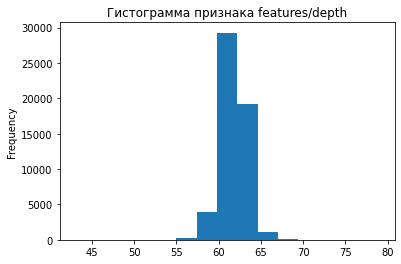

In [ ]:
df['features/depth'].plot.hist(bins=15,title='Гистограмма признака features/depth');

Пункт 3.

Вычислим среднее значение каждого из трех признаков

In [ ]:
df.mean()

features/depth    61.749146
features/x         5.731170
features/z         3.538748
dtype: float32

Для признака с максимальным средним значением(features/depth) построим эмпирическую плотность распределения.
Для построения эмпирической плотности распределения можно воспользоваться методом для построения гистограммы с параметром density=True:

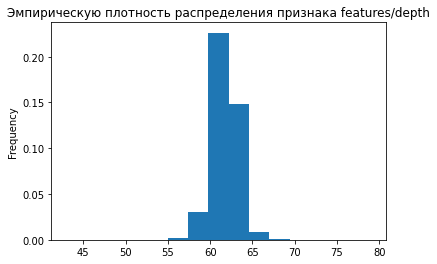

In [ ]:
df['features/depth'].plot.hist(bins=15, title='Эмпирическую плотность распределения признака features/depth', density=True);

Пункт 4.

Вычислим матрицу корреляции признаков.

In [ ]:
df.corr()

,features/depth,features/x,features/z
features/depth,1.000000,-0.025289,0.094924
features/x,-0.025289,1.000000,0.970772
features/z,0.094924,0.970772,1.000000


Наиболее низкая корреляция у признаков features/depth и features/x. Построим для них диаграмму рассеяния.

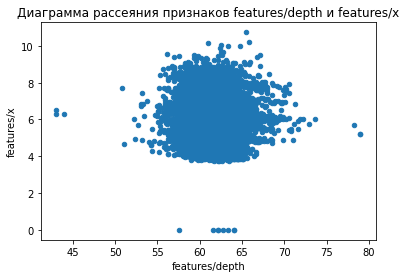

In [ ]:
df.plot.scatter('features/depth','features/x',title='Диаграмма рассеяния признаков features/depth и features/x');